<a href="https://colab.research.google.com/github/79AceVo/Text-analytics/blob/main/TopicModeling_LDA_LSA_NMF_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modeling

in this notebook we work on LDA, LSA, NMF, and BertTopic

In [1]:

# libraries for visualization
!pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel, CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:

# Download NLP resources
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# 1️⃣ Sample Dataset
documents = [
    "Amazon's customer reviews discuss product quality and shipping speed.",
    "The company's quarterly earnings report showed significant revenue growth.",
    "Tech companies are investing in artificial intelligence for business solutions.",
    "Online shopping trends show a shift towards mobile commerce.",
    "Employees review their workplace experiences on Glassdoor and LinkedIn.",
    "Discussions on Reddit and Twitter focus on upcoming AI advancements."
]

# LDA

In [5]:
# 2️⃣ Text Preprocessing for LDA, also tokenize them
def preprocess_text(texts):
    stop_words = set(stopwords.words('english'))
    processed_texts = []

    for doc in texts:
        tokens = [token.lemma_.lower() for token in nlp(doc)
                  if token.text.lower() not in stop_words and token.is_alpha]
        processed_texts.append(tokens)

    return processed_texts

tokenized_texts = preprocess_text(documents)

In [27]:
tokenized_texts

[['amazon',
  'customer',
  'review',
  'discuss',
  'product',
  'quality',
  'shipping',
  'speed'],
 ['company',
  'quarterly',
  'earning',
  'report',
  'show',
  'significant',
  'revenue',
  'growth'],
 ['tech',
  'company',
  'invest',
  'artificial',
  'intelligence',
  'business',
  'solution'],
 ['online',
  'shopping',
  'trend',
  'show',
  'shift',
  'towards',
  'mobile',
  'commerce'],
 ['employee', 'review', 'workplace', 'experience', 'glassdoor', 'linkedin'],
 ['discussion', 'reddit', 'twitter', 'focus', 'upcoming', 'ai', 'advancement']]

In [6]:
# 3️⃣ Create Dictionary & Corpus
dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts] #doc to bag of words)

In [30]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(8, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)],
 [(14, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)],
 [(5, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)],
 [(34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)]]

In [7]:
num_topics = 3 #how many topics = 3

In [8]:
# 4️⃣ Train LDA Model
def train_lda(corpus, dictionary, num_topics=3): #you can change the number of topic to make it larger
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,
                         random_state=42, passes=10, alpha='auto')
    return lda_model




In [42]:
lda_model = train_lda(corpus, dictionary, num_topics = 3)

In [43]:
# 5️⃣ Compute Coherence Score
#Higher the coherence, the model is better.

def compute_coherence(lda_model, texts, dictionary):
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

coherence_score = compute_coherence(lda_model, tokenized_texts, dictionary)
print(f'Coherence Score: {coherence_score:.4f}')

# 6️⃣ Compute Perplexity Score
#Lower the perplexity, the model is better.
perplexity = lda_model.log_perplexity(corpus)
print(f'Perplexity Score: {np.exp(perplexity):.4f}')  # Convert log perplexity to perplexity


Coherence Score: 0.3676
Perplexity Score: 0.0138


In [44]:
# 7️⃣ Visualizing LDA Topics with pyLDAvis
pyLDAvis.enable_notebook()
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)


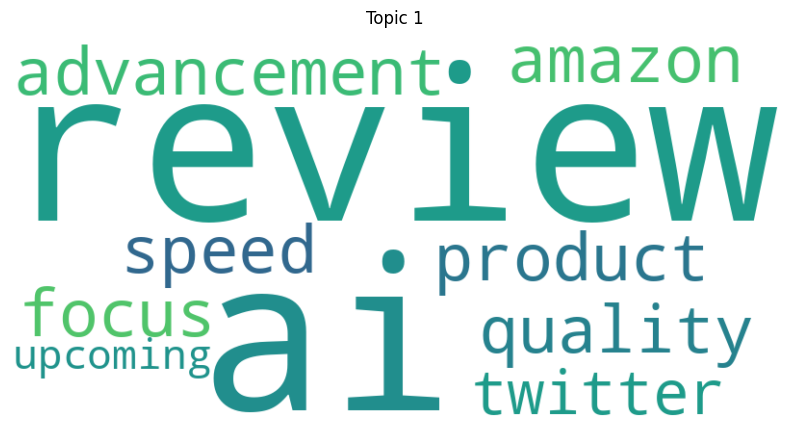

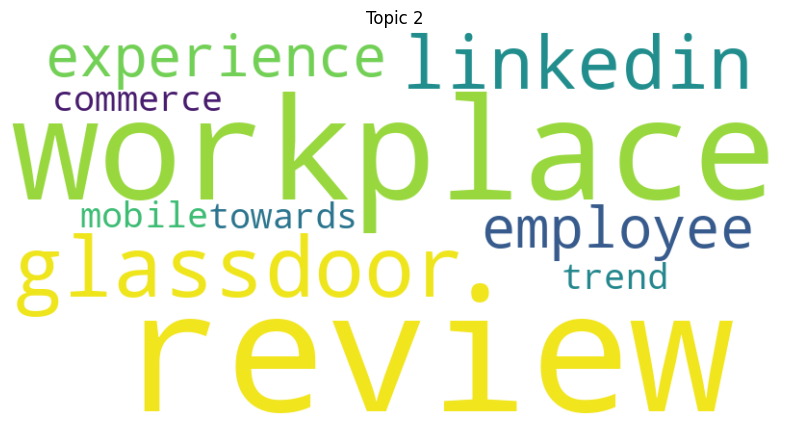

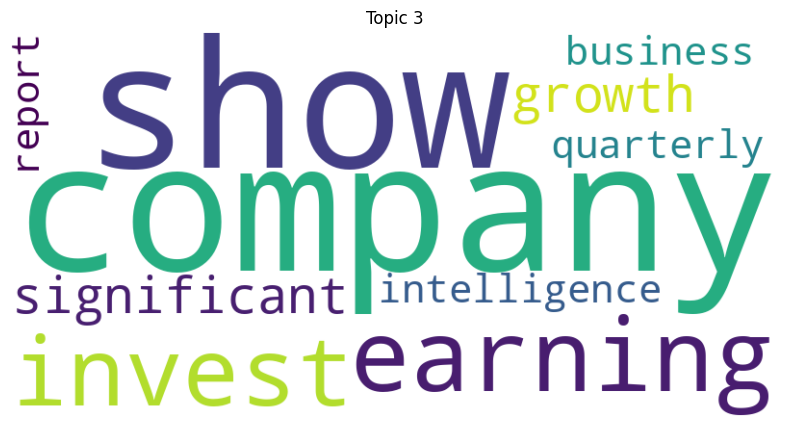


=== Top Words for Each Topic ===
Topic 1: review, ai, advancement, quality, focus, product, speed, amazon, twitter, upcoming
Topic 2: review, workplace, glassdoor, linkedin, experience, employee, trend, towards, commerce, mobile
Topic 3: company, show, earning, invest, significant, growth, intelligence, business, quarterly, report


In [45]:
# 8️⃣ Generate Word Clouds for Each Topic
# Dictionary to store topic words
lda_topic_words = {}

for topic in range(3): #no of topic
    words = dict(lda_model.show_topic(topic, 10))  # Extract top 10 words
    topic_to_print = topic+ 1
    lda_topic_words[f"Topic {topic_to_print}"] = list(words.keys())  # Store words

    # Generate Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_to_print}")
    plt.show()

# Display topics in a structured format
print("\n=== Top Words for Each Topic ===")
for topic, words in lda_topic_words.items():
    print(f"{topic}: {', '.join(words)}")

In [12]:
lda_topic_words

{'Topic 1': ['review',
  'ai',
  'advancement',
  'quality',
  'focus',
  'product',
  'speed',
  'amazon',
  'twitter',
  'upcoming'],
 'Topic 2': ['review',
  'workplace',
  'glassdoor',
  'linkedin',
  'experience',
  'employee',
  'trend',
  'towards',
  'commerce',
  'mobile'],
 'Topic 3': ['company',
  'show',
  'earning',
  'invest',
  'significant',
  'growth',
  'intelligence',
  'business',
  'quarterly',
  'report']}

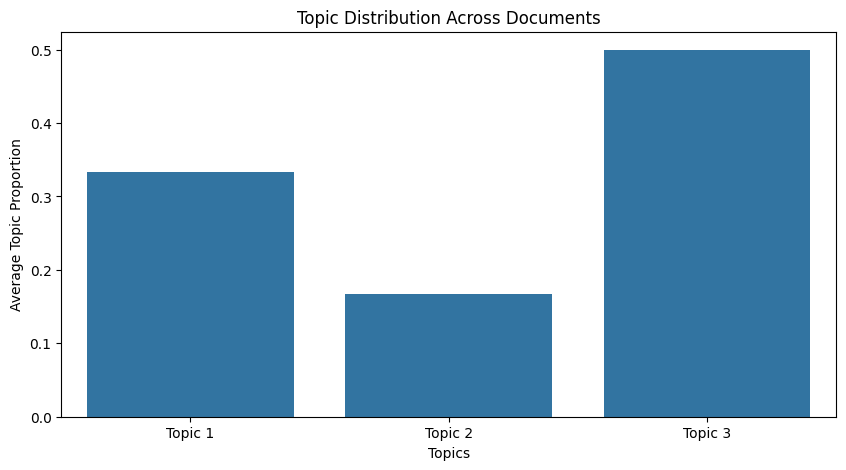

In [46]:
# 9️⃣ Visualize Topic Distribution
def plot_topic_distributions(lda_model, corpus):
    topic_proportions = np.array([lda_model.get_document_topics(doc, minimum_probability=0) for doc in corpus])
    topic_proportions = np.array([[prob for _, prob in doc] for doc in topic_proportions])
    avg_topic_proportions = topic_proportions.mean(axis=0)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=[f'Topic {i+1}' for i in range(len(avg_topic_proportions))], y=avg_topic_proportions)
    plt.xlabel("Topics")
    plt.ylabel("Average Topic Proportion")
    plt.title("Topic Distribution Across Documents")
    plt.show()

plot_topic_distributions(lda_model, corpus)

In [14]:
#Print the 10 topics
lda_model.print_topics()

[(0,
  '0.047*"review" + 0.047*"ai" + 0.047*"advancement" + 0.047*"quality" + 0.047*"focus" + 0.047*"product" + 0.047*"speed" + 0.047*"amazon" + 0.047*"twitter" + 0.047*"upcoming"'),
 (1,
  '0.068*"review" + 0.068*"workplace" + 0.068*"glassdoor" + 0.068*"linkedin" + 0.068*"experience" + 0.068*"employee" + 0.017*"trend" + 0.017*"towards" + 0.017*"commerce" + 0.017*"mobile"'),
 (2,
  '0.064*"company" + 0.064*"show" + 0.036*"earning" + 0.036*"invest" + 0.036*"significant" + 0.036*"growth" + 0.036*"intelligence" + 0.036*"business" + 0.036*"quarterly" + 0.036*"report"')]

Now you know each topic is different, what would you name them? that's interpretation from unsupervised learning that we need.

In [60]:
# prompt: provide distribution of lda topics for each texts

import pandas as pd

def get_topic_distribution(lda_model, corpus):
  """
  Generates a DataFrame showing the topic distribution for each document.

  Args:
      lda_model: The trained LDA model.
      corpus: The corpus of documents.

  Returns:
      A pandas DataFrame where each row represents a document and each column
      represents a topic, with values indicating the probability of the document
      belonging to that topic.
  """
  topic_distributions = []
  for doc in corpus:
      topic_dist = lda_model.get_document_topics(doc, minimum_probability=0)
      # Convert the topic distribution to a dictionary for easier handling
      topic_dist_dict = dict(topic_dist)
      # Ensure all topics are present in the dictionary, filling missing ones with 0
      for i in range(lda_model.num_topics):
        if i not in topic_dist_dict:
          topic_dist_dict[i] = 0

      topic_distributions.append(topic_dist_dict)

  # Create a DataFrame
  df_topic_distributions = pd.DataFrame(topic_distributions)
  # Reorder columns to be topic1, topic2 etc.
  df_topic_distributions = df_topic_distributions.reindex(sorted(df_topic_distributions.columns), axis=1)
  return df_topic_distributions

# Example usage (assuming lda_model and corpus are already defined):
topic_distribution_df = get_topic_distribution(lda_model, corpus)
topic_distribution_df


,0,1,2
0,0.977592,0.007147,0.015260
1,0.010772,0.007147,0.982081
2,0.012253,0.008130,0.979617
3,0.010772,0.007147,0.982081
4,0.014206,0.965670,0.020124
5,0.974512,0.008130,0.017358


# LSA

In [15]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

In [16]:
# 2️⃣ Text Preprocessing
def preprocess_text(texts):
    stop_words = set(stopwords.words('english'))
    processed_texts = []

    for doc in texts:
        tokens = [token.lemma_.lower() for token in nlp(doc)
                  if token.text.lower() not in stop_words and token.is_alpha]
        processed_texts.append(" ".join(tokens))  # Convert tokens back to text

    return processed_texts

cleaned_texts = preprocess_text(documents)

In [17]:
cleaned_texts

['amazon customer review discuss product quality shipping speed',
 'company quarterly earning report show significant revenue growth',
 'tech company invest artificial intelligence business solution',
 'online shopping trend show shift towards mobile commerce',
 'employee review workplace experience glassdoor linkedin',
 'discussion reddit twitter focus upcoming ai advancement']

In [18]:
# 3️⃣ Convert Text into TF-IDF Vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(cleaned_texts)


In [19]:
print(cleaned_texts[0]) #first doc
print(tfidf_matrix.toarray()[0]) # example of first

amazon customer review discuss product quality shipping speed
[0.         0.         0.36102204 0.         0.         0.
 0.         0.36102204 0.36102204 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.36102204 0.36102204 0.
 0.         0.         0.         0.29604324 0.         0.36102204
 0.         0.         0.         0.36102204 0.         0.
 0.         0.         0.        ]


In [20]:
# 4️⃣ Apply LSA (LSI) using Truncated SVD

svd_model = TruncatedSVD(n_components=num_topics, random_state=42)
lsa_model = svd_model.fit_transform(tfidf_matrix)
normalizer = Normalizer(copy=False) # Normalize for better clustering
lsa_model = normalizer.fit_transform(lsa_model)


In [21]:
# 5️⃣ Display Top Words for Each Topic
lsa_topic_words = {}
lsa_terms = vectorizer.get_feature_names_out()

# Define the number of topics
num_topics = 10

for i, comp in enumerate(svd_model.components_):
  terms_in_topic = [lsa_terms[i] for i in comp.argsort()[:-num_topics - 1:-1]]
  lsa_topic_words[f"Topic {i+1}"] = terms_in_topic
  print(f"Topic {i+1}: {', '.join(terms_in_topic)}")
lsa_topic_words

Topic 1: review, workplace, experience, linkedin, employee, glassdoor, customer, shipping, speed, product
Topic 2: company, report, significant, earning, quarterly, growth, revenue, artificial, invest, tech
Topic 3: advancement, twitter, upcoming, discussion, focus, reddit, ai, commerce, shift, online


{'Topic 1': ['review',
  'workplace',
  'experience',
  'linkedin',
  'employee',
  'glassdoor',
  'customer',
  'shipping',
  'speed',
  'product'],
 'Topic 2': ['company',
  'report',
  'significant',
  'earning',
  'quarterly',
  'growth',
  'revenue',
  'artificial',
  'invest',
  'tech'],
 'Topic 3': ['advancement',
  'twitter',
  'upcoming',
  'discussion',
  'focus',
  'reddit',
  'ai',
  'commerce',
  'shift',
  'online']}

In [22]:
# 6️⃣ Coherence Approximation using Singular Values
singular_values = svd_model.singular_values_
print(f"Singular Values: {singular_values}")

Singular Values: [1.04972744 1.04917896 1.        ]


The larger the singular value, the more important the corresponding topic is in explaining the structure of the dataset.

These values (around 1.0) suggest that all three topics are fairly similar in importance, as their singular values are very close to each other and all are close to 1.

The first two explain slightly more variance in the data than the third topic, but not by much.

All singular values are close to 1 = that three topics are enough to represent most of the important structure in the data, and adding more topics would likely not improve the model much.

If components with singular values much lower than 1 ( 0.5 or 0.1), consider discarding them

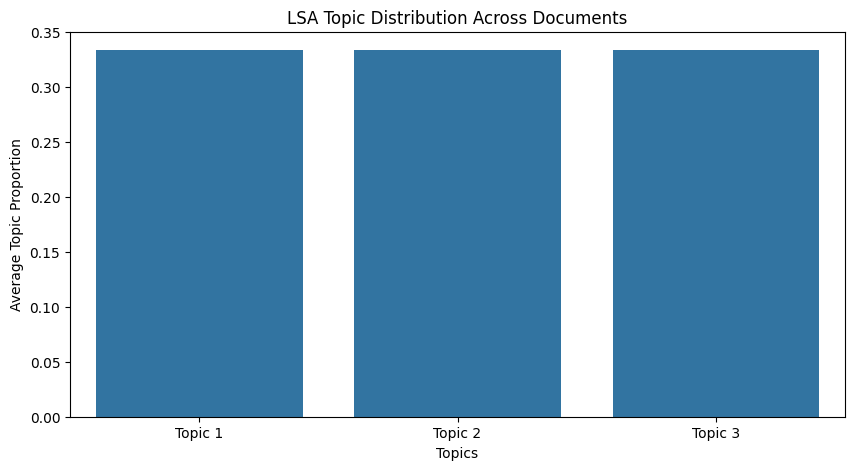

In [23]:
#  7️⃣ Visualizing Topic Distributions
topic_proportions = np.mean(np.abs(lsa_model), axis=0)

plt.figure(figsize=(10, 5))
sns.barplot(x=[f'Topic {i+1}' for i in range(len(topic_proportions))], y=topic_proportions)
plt.xlabel("Topics")
plt.ylabel("Average Topic Proportion")
plt.title("LSA Topic Distribution Across Documents")
plt.show()


In [26]:
topic

array([ 3.77574618e-01,  3.77574618e-01, -1.31218594e-16,  4.29472624e-15,
        3.97860809e-15,  1.85375999e-02,  4.12947437e-16, -4.53384070e-20,
       -4.53384070e-20,  3.77574618e-01, -3.55374963e-15,  1.03327680e-15,
        1.03327680e-15,  3.77574618e-01,  1.03327680e-15, -3.55374963e-15,
        4.00619723e-15,  4.00619723e-15,  1.03327680e-15,  1.85375999e-02,
        1.85375999e-02, -4.53384070e-20, -4.53384070e-20, -3.55374963e-15,
        3.77574618e-01, -3.55374963e-15, -3.55374963e-15,  8.12049371e-16,
        1.85375999e-02, -4.53384070e-20,  1.85375999e-02, -3.55374963e-15,
        4.00654770e-15, -6.11687057e-18,  3.95068608e-15,  1.85375999e-02,
        3.77574618e-01,  3.77574618e-01,  1.03137564e-15])

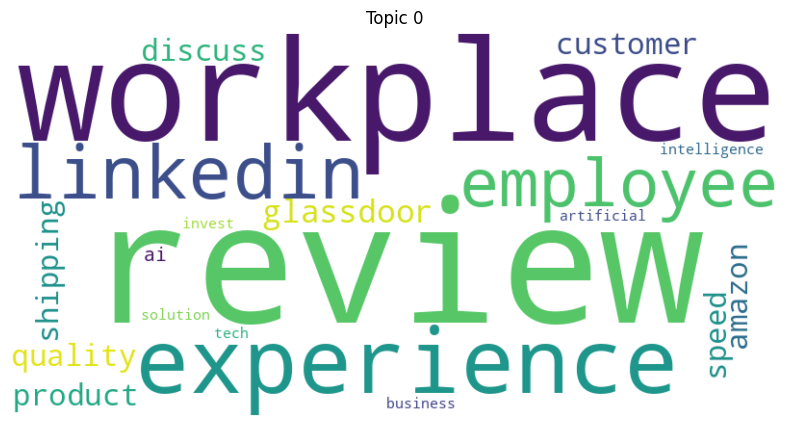

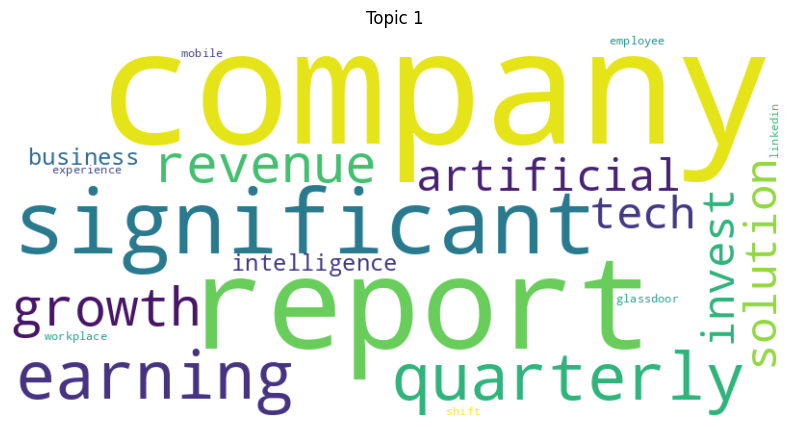

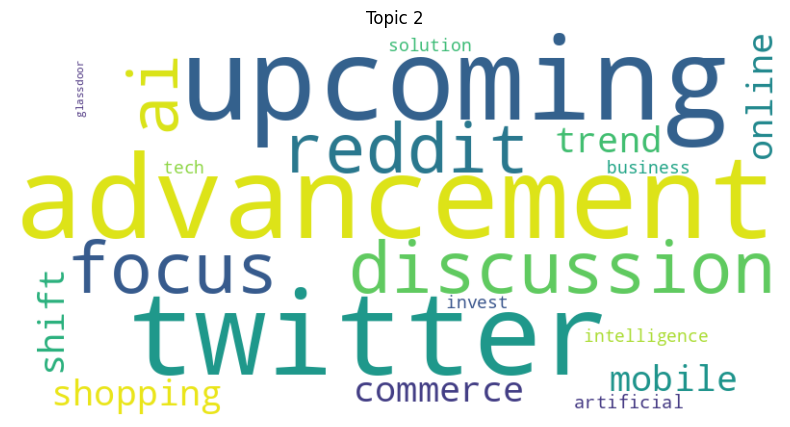

In [58]:
# Iterate through each topic
num_topics = 3
for topic_idx in range(num_topics):

    topic = svd_model.components_[topic_idx]

    # Extract top words for the topic
    word_freqs = {lsa_terms[i]: topic[i] for i in topic.argsort()[:-20 - 1:-1]}

    # Generate and display word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freqs)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_idx}")
    plt.show()

#NMF

In [47]:
from sklearn.decomposition import NMF

In [48]:
# 4️⃣ Apply NMF for Topic Modeling
num_topics = 3
nmf_model = NMF(n_components=num_topics, random_state=42, init='nndsvd', max_iter = 200)
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)



/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [49]:

# Get feature names from the vectorizer
nmf_terms = vectorizer.get_feature_names_out()

# Define the number of topics
num_topics = 3
top_n = 10  # Number of top words per topic

# Dictionary to store topics and words
nmf_topic_words = {}

# Step 1: Print Top Words for Each Topic
print("\n=== List of Top Words for Each Topic ===")
for topic_idx in range(num_topics):
    topic = nmf_model.components_[topic_idx]

    # Extract top words for the topic
    words = [nmf_terms[j] for j in topic.argsort()[:-top_n - 1:-1]]
    nmf_topic_words[f"Topic {topic_idx+1}"] = words

    # Print topic words
    print(f"Topic {topic_idx+1}: {', '.join(words)}")



=== List of Top Words for Each Topic ===
Topic 1: review, employee, linkedin, experience, workplace, glassdoor, discuss, amazon, product, quality
Topic 2: company, revenue, business, intelligence, invest, earning, quarterly, report, growth, significant
Topic 3: mobile, commerce, online, shopping, shift, trend, artificial, business, amazon, company


In [50]:
nmf_topic_words

{'Topic 1': ['review',
  'employee',
  'linkedin',
  'experience',
  'workplace',
  'glassdoor',
  'discuss',
  'amazon',
  'product',
  'quality'],
 'Topic 2': ['company',
  'revenue',
  'business',
  'intelligence',
  'invest',
  'earning',
  'quarterly',
  'report',
  'growth',
  'significant'],
 'Topic 3': ['mobile',
  'commerce',
  'online',
  'shopping',
  'shift',
  'trend',
  'artificial',
  'business',
  'amazon',
  'company']}

In [51]:
# 6️⃣ Compute Reconstruction Error (Proxy for Model Quality)
print(f"Reconstruction Error: {nmf_model.reconstruction_err_}")


Reconstruction Error: 1.6725118225746125


Lower is better → A lower reconstruction error means the NMF topics closely approximate the original dataset.

1.67 is a reasonable value

In [52]:
pd.DataFrame(data = [nmf_topic_words, lsa_topic_words, lda_topic_words])

,Topic 1,Topic 2,Topic 3
0,"[review, employee, linkedin, experience, workp...","[company, revenue, business, intelligence, inv...","[mobile, commerce, online, shopping, shift, tr..."
1,"[review, workplace, experience, linkedin, empl...","[company, report, significant, earning, quarte...","[advancement, twitter, upcoming, discussion, f..."
2,"[review, ai, advancement, quality, focus, prod...","[review, workplace, glassdoor, linkedin, exper...","[company, show, earning, invest, significant, ..."


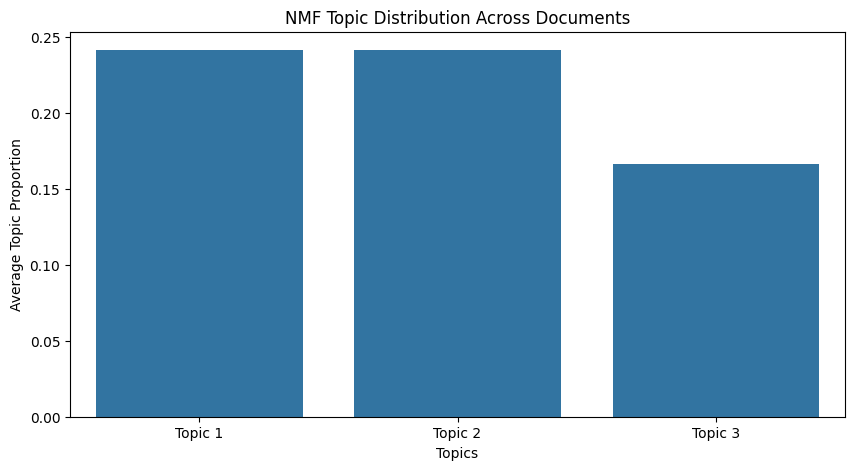

In [53]:
# 7️⃣ Visualizing Topic Distributions
topic_proportions = np.mean(nmf_matrix, axis=0)

plt.figure(figsize=(10, 5))
sns.barplot(x=[f'Topic {i+1}' for i in range(len(topic_proportions))], y=topic_proportions)
plt.xlabel("Topics")
plt.ylabel("Average Topic Proportion")
plt.title("NMF Topic Distribution Across Documents")
plt.show()




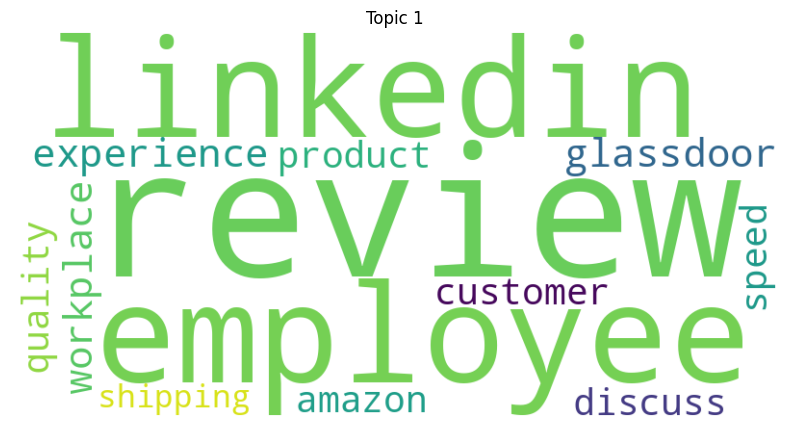

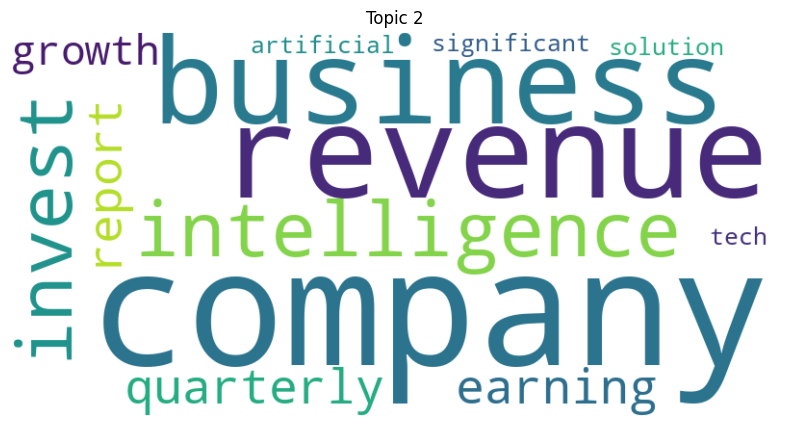

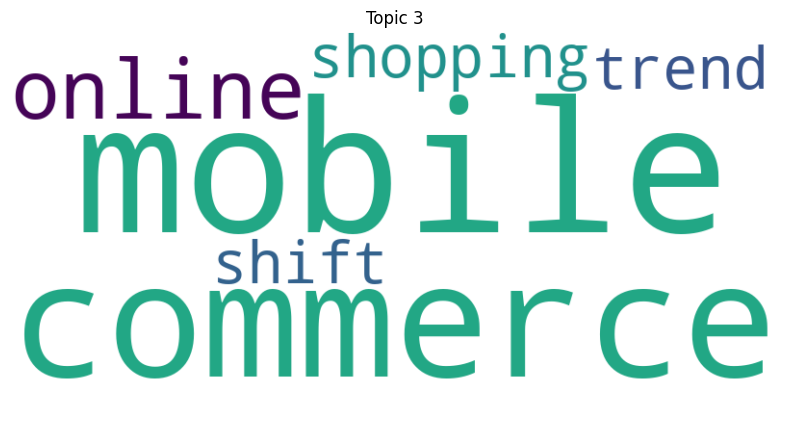

In [54]:
# Generate Word Clouds for Each Topic
def generate_word_clouds(model, vectorizer, num_topics):
    terms = vectorizer.get_feature_names_out()

    for topic_idx, topic in enumerate(model.components_):
        word_freqs = {terms[i]: topic[i] for i in topic.argsort()[:-20 - 1:-1]}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freqs)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Topic {topic_idx+1}")
        plt.show()

generate_word_clouds(nmf_model, vectorizer, num_topics)

In [55]:
comparison = pd.DataFrame(data = [nmf_topic_words, lsa_topic_words, lda_topic_words], index = ['nmf','lsa','lda'])

In [56]:
comparison

,Topic 1,Topic 2,Topic 3
nmf,"[review, employee, linkedin, experience, workp...","[company, revenue, business, intelligence, inv...","[mobile, commerce, online, shopping, shift, tr..."
lsa,"[review, workplace, experience, linkedin, empl...","[company, report, significant, earning, quarte...","[advancement, twitter, upcoming, discussion, f..."
lda,"[review, ai, advancement, quality, focus, prod...","[review, workplace, glassdoor, linkedin, exper...","[company, show, earning, invest, significant, ..."
